# Chapter 16
## Downloading Data

### The CSV file format

Data is from <https://www.nostarch.com/pythoncrashcourse/>.

#### Parsing the CSV file headers

In [1]:
import csv

filename = 'chapter_16_resources/sitka_weather_07-2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    print(header_row)

['AKDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF', 'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity', ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn', ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn', ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles', ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH', 'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees']


#### Printing the headers and their positions

In [2]:
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    for index, column_header in enumerate(header_row):
        print(index, column_header)

0 AKDT
1 Max TemperatureF
2 Mean TemperatureF
3 Min TemperatureF
4 Max Dew PointF
5 MeanDew PointF
6 Min DewpointF
7 Max Humidity
8  Mean Humidity
9  Min Humidity
10  Max Sea Level PressureIn
11  Mean Sea Level PressureIn
12  Min Sea Level PressureIn
13  Max VisibilityMiles
14  Mean VisibilityMiles
15  Min VisibilityMiles
16  Max Wind SpeedMPH
17  Mean Wind SpeedMPH
18  Max Gust SpeedMPH
19 PrecipitationIn
20  CloudCover
21  Events
22  WindDirDegrees


#### Extracting and reading data

In [4]:
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    highs = [int(row[1]) for row in reader]
    print(highs)

[64, 71, 64, 59, 69, 62, 61, 55, 57, 61, 57, 59, 57, 61, 64, 61, 59, 63, 60, 57, 69, 63, 62, 59, 57, 57, 61, 59, 61, 61, 66]


#### Plotting data in a temperature chart

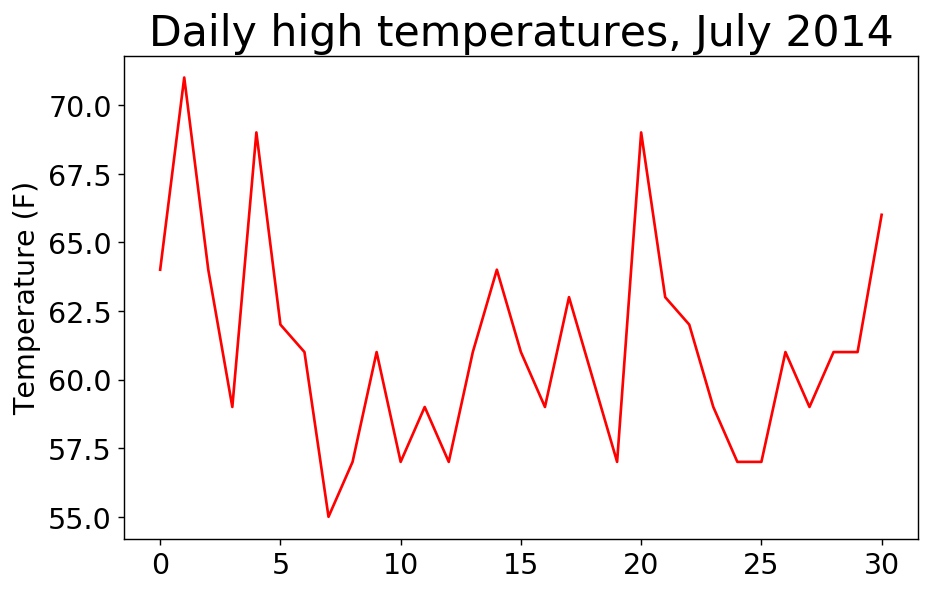

In [9]:
from matplotlib import pyplot as plt

fig = plt.figure(dpi=128, figsize=(8, 5))
plt.plot(highs, c='red')
plt.title('Daily high temperatures, July 2014', fontsize=24)
plt.xlabel('')
plt.ylabel('Temperature (F)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

#### The `datetime` module

In [11]:
from datetime import datetime
first_date = datetime.strptime('2014-7-1', '%Y-%m-%d')
print(first_date)

2014-07-01 00:00:00


#### Plotting dates

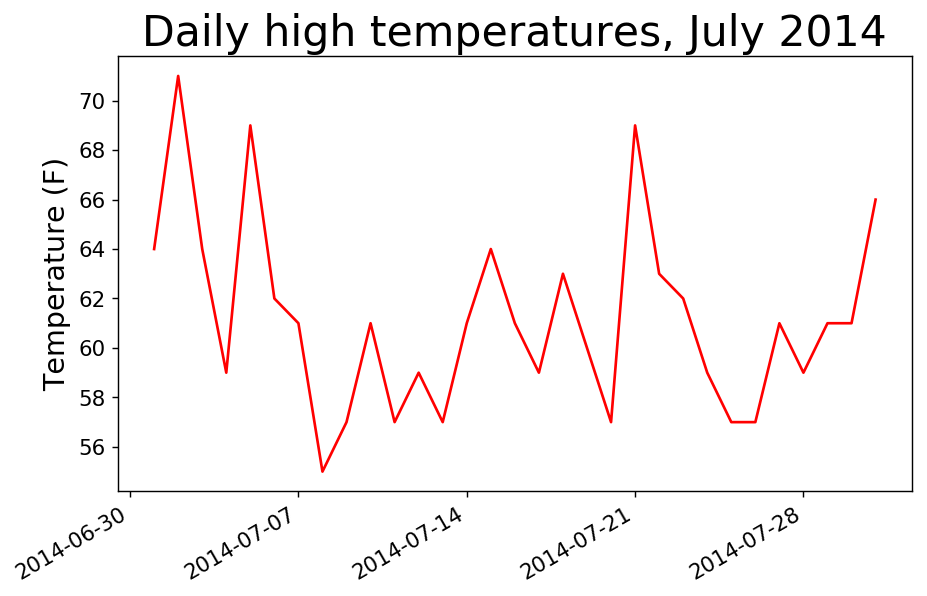

In [24]:
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs = [], []
    for row in reader:
        dates.append(datetime.strptime(row[0], '%Y-%m-%d'))
        highs.append(int(row[1]))

fig = plt.figure(dpi=128, figsize=(8, 5))
plt.plot(dates, highs, c='red')
fig.autofmt_xdate()
plt.title('Daily high temperatures, July 2014', fontsize=24)
plt.xlabel('')
plt.ylabel('Temperature (F)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

#### Plotting a longer timeframe

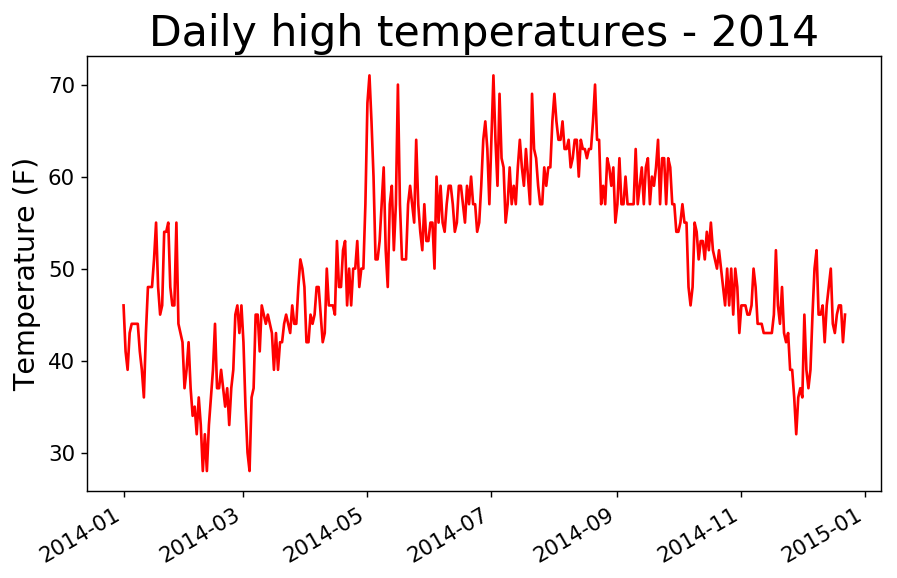

In [27]:
filename = 'chapter_16_resources/sitka_weather_2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs = [], []
    for row in reader:
        dates.append(datetime.strptime(row[0], '%Y-%m-%d'))
        highs.append(int(row[1]))

fig = plt.figure(dpi=128, figsize=(8, 5))
plt.plot(dates, highs, c='red')
fig.autofmt_xdate()
plt.title('Daily high temperatures - 2014', fontsize=24)
plt.xlabel('')
plt.ylabel('Temperature (F)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

#### Plotting a second data series

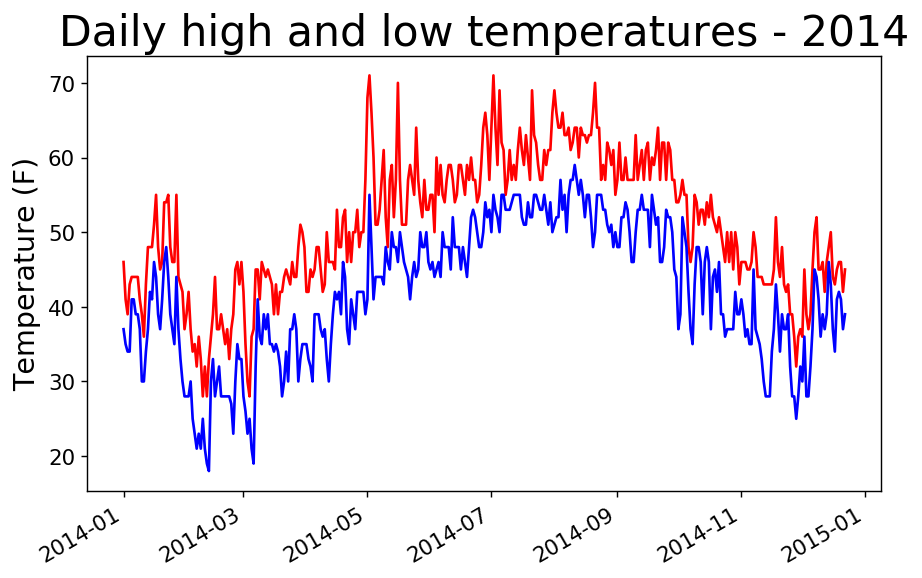

In [28]:
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs, lows = [], [], []
    for row in reader:
        dates.append(datetime.strptime(row[0], '%Y-%m-%d'))
        highs.append(int(row[1]))
        lows.append(int(row[3]))

fig = plt.figure(dpi=128, figsize=(8, 5))
plt.plot(dates, highs, c='red')
plt.plot(dates, lows, c='blue')
fig.autofmt_xdate()
plt.title('Daily high and low temperatures - 2014', fontsize=24)
plt.xlabel('')
plt.ylabel('Temperature (F)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

#### Shading an area in the chart

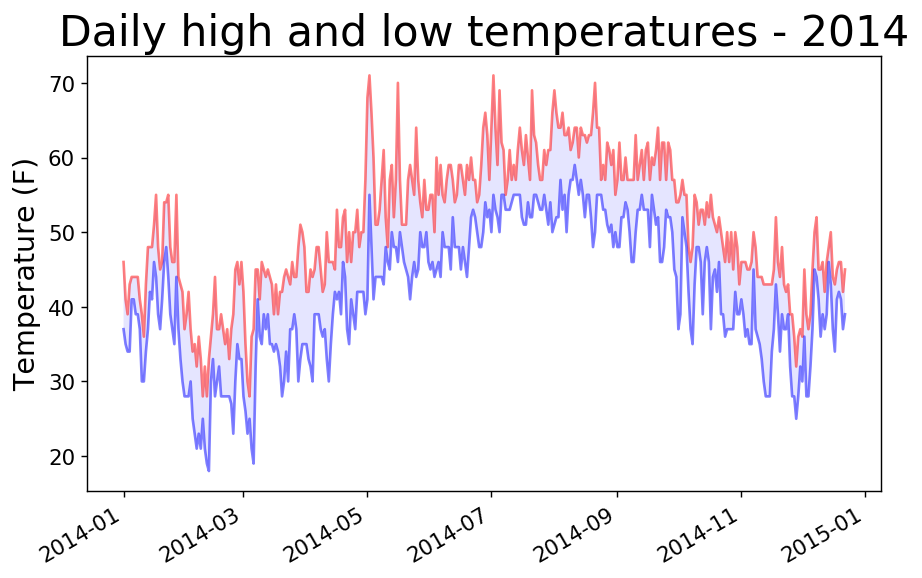

In [32]:
fig = plt.figure(dpi=128, figsize=(8, 5))
plt.plot(dates, highs, c='red', alpha=0.5)
plt.plot(dates, lows, c='blue', alpha=0.5)
plt.fill_between(dates, lows, highs, facecolor='blue', alpha=0.1)
fig.autofmt_xdate()
plt.title('Daily high and low temperatures - 2014', fontsize=24)
plt.xlabel('')
plt.ylabel('Temperature (F)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

#### Error-checking

2014-02-16 00:00:00 missing data


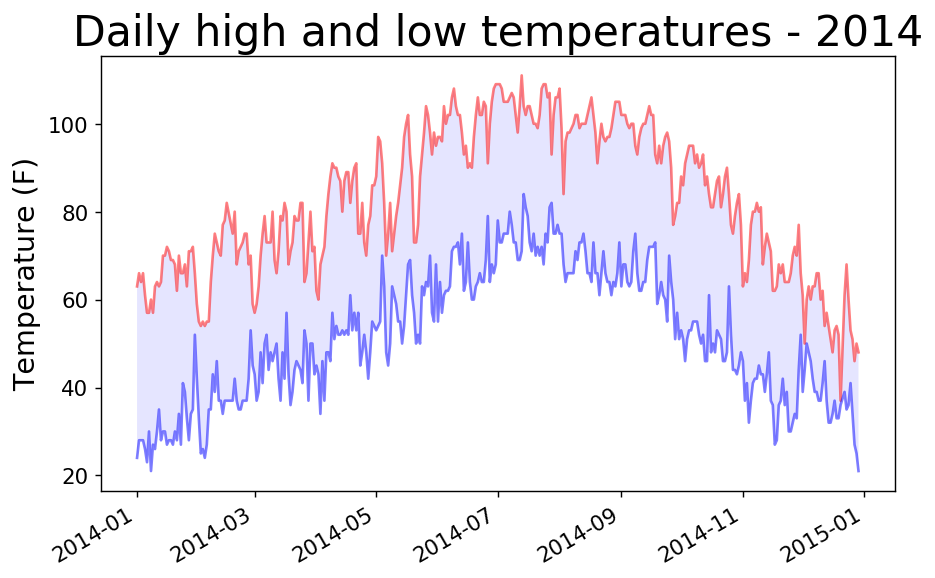

In [43]:
filename = 'chapter_16_resources/death_valley_2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs, lows = [], [], []
    for row in reader:
        try:
            current_date = datetime.strptime(row[0], '%Y-%m-%d')
            high = int(row[1])
            low = int(row[3])
        except ValueError:
            print(current_date, 'missing data')
        else:
            dates.append(current_date)
            highs.append(high)
            lows.append(low)

fig = plt.figure(dpi=128, figsize=(8, 5))
plt.plot(dates, highs, c='red', alpha=0.5)
plt.plot(dates, lows, c='blue', alpha=0.5)
plt.fill_between(dates, lows, highs, facecolor='blue', alpha=0.1)
fig.autofmt_xdate()
plt.title('Daily high and low temperatures - 2014', fontsize=24)
plt.xlabel('')
plt.ylabel('Temperature (F)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

#### Try it yourself

2014-02-16 00:00:00 missing data


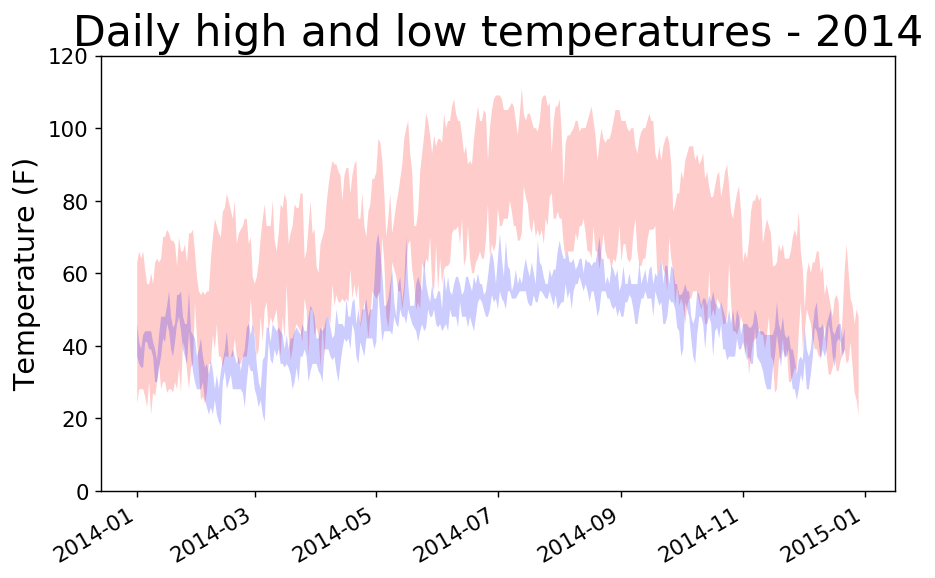

In [65]:
# 16-1. San Francisco: Are temperatures in San Francisco more like temperatures
# in Sitka or temperatures in Death Valley? Generate a high-low temperature
# plot for San Francisco and make a comparison. (You can download weather data
# for almost any location from www.wunderground.com/history/. Enter a location
# and date range, scroll to the bottom of the page, and find a link labeled
# 'Comma-Delimeted File'.)

# 16-2. Sitka-Death Valley comparison: The temperature scales on the Sitka and
# Death Valley graphs reflect the different ranges of the data. To accurately
# compare the temperature ranges, you need identical scales on the y-axis.
# Change the settings for the y-axis on one or both of the charts and make a
# direct comparison between temperature ranges in Sitka and Death Valley.
# Tyou can also try plotting the two data sets on the same chart.

def plot_weather_data_for_file(filename, fill_color=(0, 0, 1, 0.1), show_low_and_high=True):
    with open(filename) as f:
        reader = csv.reader(f)
        header_row = next(reader)
    
        dates, highs, lows = [], [], []
        for row in reader:
            try:
                current_date = datetime.strptime(row[0], '%Y-%m-%d')
                high = int(row[1])
                low = int(row[3])
            except ValueError:
                print(current_date, 'missing data')
            else:
                dates.append(current_date)
                highs.append(high)
                lows.append(low)
    
    if show_low_and_high:
        plt.plot(dates, highs, c='red', alpha=0.5)
        plt.plot(dates, lows, c='blue', alpha=0.5)
    plt.fill_between(dates, lows, highs, facecolor=fill_color)
    fig.autofmt_xdate()
    plt.title('Daily high and low temperatures - 2014', fontsize=24)
    plt.xlabel('')
    plt.ylabel('Temperature (F)', fontsize=16)
    plt.ylim((0, 120))
    plt.tick_params(axis='both', which='major', labelsize=12)

fig = plt.figure(dpi=128, figsize=(8, 5))
plot_weather_data_for_file('chapter_16_resources/death_valley_2014.csv', fill_color=(1, 0, 0, 0.2), show_low_and_high=False)
plot_weather_data_for_file('chapter_16_resources/sitka_weather_2014.csv', fill_color=(0, 0, 1, 0.2), show_low_and_high=False)
plt.show()